In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# From Covid Tracking API
# https://covidtracking.com/api/
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

# https://github.com/COVID19Tracking/associated-data
f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [4]:
df_us = pd.read_json(api_us)
df_states = pd.read_json(api_states)
df_pop = pd.read_csv(f_pop)

In [5]:
df_us.shape

(26, 17)

In [6]:
df_states.shape

(1317, 17)

In [7]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [8]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [9]:
df_us.sort_values(by=['date']).tail()

,date,states,positive,negative,posNeg,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
4,2020-03-25,56,63928,357604,421532,51235,6136.0,900.0,472767,99e1bdff6a809d12b2e76a9e7c8a678d32a6f670,2020-03-25T20:00:00Z,421532,225.0,1668.0,64846.0,11974.0,76820.0
3,2020-03-26,56,80735,438603,519338,60251,10131.0,1163.0,579589,77e73bd9ca5316e76685e4fd31fd7adbd7ba4f45,2020-03-26T20:00:00Z,519338,263.0,3995.0,80999.0,16807.0,97806.0
2,2020-03-27,56,99413,527220,626633,60094,13718.0,1530.0,686727,5e9611f927d035074ac65594ad30669ef8299d75,2020-03-27T20:00:00Z,626633,367.0,3587.0,88617.0,18678.0,107295.0
1,2020-03-28,56,118234,617470,735704,65712,16729.0,1965.0,801416,a54933aec2de2cb0f418ffbc85c6c58d7481be77,2020-03-28T20:00:00Z,735704,435.0,3011.0,90250.0,18821.0,109071.0
0,2020-03-29,56,139061,692290,831351,65549,19730.0,2428.0,896900,0bcb1178e16a889408a98222caae4bd49fe3d9b8,2020-03-29T20:00:00Z,831351,463.0,3001.0,74820.0,20827.0,95647.0


In [10]:
df_states.sort_values(by=['date']).tail()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
32,2020-03-29,NE,108.0,1968.0,4.0,NaN,2.0,2080,44e85c9c9b448faa6a1b8a6af39c84820610bff0,2020-03-29T20:00:00Z,2076,31,0.0,0.0,64.0,12.0,76.0
31,2020-03-29,ND,98.0,3355.0,NaN,17.0,1.0,3453,2c4c2aa7b34f5a07b885b9fe64752fa44d9decb5,2020-03-29T20:00:00Z,3453,38,0.0,1.0,546.0,15.0,561.0
30,2020-03-29,NC,1040.0,17905.0,NaN,91.0,4.0,18945,94c103bb6dc3385d5a5f366a0913180f83223df8,2020-03-29T20:00:00Z,18945,37,0.0,4.0,1313.0,105.0,1418.0
28,2020-03-29,MS,758.0,2560.0,NaN,235.0,14.0,3318,daa6037b61ae96e6c2526a155139e7e732cd0368,2020-03-29T20:00:00Z,3318,28,1.0,16.0,0.0,95.0,95.0
0,2020-03-29,AK,102.0,3232.0,NaN,6.0,2.0,3334,d4c0789e67f59e98176a9ea96200ed348161c6d4,2020-03-29T20:00:00Z,3334,2,0.0,1.0,396.0,17.0,413.0


In [11]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive as percent of population
df_states['pos_by_pop'] = df_states['positive'] / df_states['population']

# Calculate total tests
df_states['total'] = df_states['positive'] + df_states['negative']

# Calculate percent of tests that are positive
df_states['positive_rate'] = df_states['positive'] / df_states['total']

# Calculate percent of population tested
df_states['test_rate'] = df_states['total'] / df_states['population']

In [12]:
df_states.tail()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,...,negativeIncrease,positiveIncrease,totalTestResultsIncrease,state_name,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
1256,2020-03-11,WY,0.0,NaN,NaN,NaN,NaN,NaN,18fc4cee9e62382b649645f5fb862fd1598ad7c2,2020-03-11T20:00:00Z,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1257,2020-03-10,WY,0.0,0.0,0.0,NaN,NaN,0.0,ac695ca11cd43d13514370bf495bb3af78f1b66f,2020-03-10T20:00:00Z,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,0.0
1258,2020-03-09,WY,0.0,NaN,NaN,NaN,NaN,NaN,1306b115d298a86cb3e626a0d975e35767198712,2020-03-09T20:00:00Z,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1259,2020-03-08,WY,0.0,NaN,NaN,NaN,NaN,NaN,3c360a7f81ed305bc73fb5dfbc07aec951489c2f,2020-03-08T20:00:00Z,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1260,2020-03-07,WY,0.0,NaN,NaN,NaN,NaN,NaN,d311061ed771387fdb2db7b876bf2f72435f0de7,2020-03-07T21:00:00Z,...,NaN,NaN,NaN,Wyoming,56,577737,5.950611,0.0,NaN,NaN


In [13]:
df_states.describe()

,positive,negative,pending,hospitalized,death,total,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
count,1261.000000,1156.000000,414.00000,224.000000,597.000000,1156.000000,1261.000000,1261.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1261.000000,1.261000e+03,1247.000000,1261.000000,1151.000000,1156.000000
mean,562.076923,3416.185121,866.36715,351.281250,17.850921,4028.041522,3693.805710,29.471055,2.008271,16.362283,571.393714,114.844500,686.237386,29.471055,6.568948e+06,430.624643,0.000063,0.126320,0.000696
std,3189.878745,8923.746375,6463.30854,1321.734014,62.452368,11897.721168,11445.104107,16.249254,11.568036,139.996184,1499.405250,552.175921,1900.246687,16.249254,7.392867e+06,1603.851957,0.000188,0.149840,0.001147
min,0.000000,0.000000,-3.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-44.000000,-1.000000,-6.000000,1.000000,5.777370e+05,1.291523,0.000000,0.000000,0.000000
25%,6.000000,83.750000,4.00000,15.000000,1.000000,99.000000,59.000000,16.000000,0.000000,0.000000,0.000000,1.000000,10.000000,16.000000,1.805832e+06,54.955978,0.000001,0.040015,0.000024
50%,43.000000,420.500000,21.00000,56.500000,3.000000,525.000000,397.000000,29.000000,0.000000,0.000000,41.000000,10.000000,71.000000,29.000000,4.468402e+06,109.860468,0.000012,0.083333,0.000155
75%,218.000000,2677.500000,93.50000,173.000000,12.000000,3037.250000,2723.000000,42.000000,1.000000,0.000000,427.000000,48.000000,499.000000,42.000000,7.535591e+06,229.511156,0.000058,0.151779,0.000892
max,59513.000000,112847.000000,64400.00000,12075.000000,965.000000,172360.000000,172360.000000,72.000000,237.000000,3039.000000,16272.000000,7683.000000,23649.000000,72.000000,3.955704e+07,11490.119540,0.003045,0.891705,0.008820


# United States Positive Cases

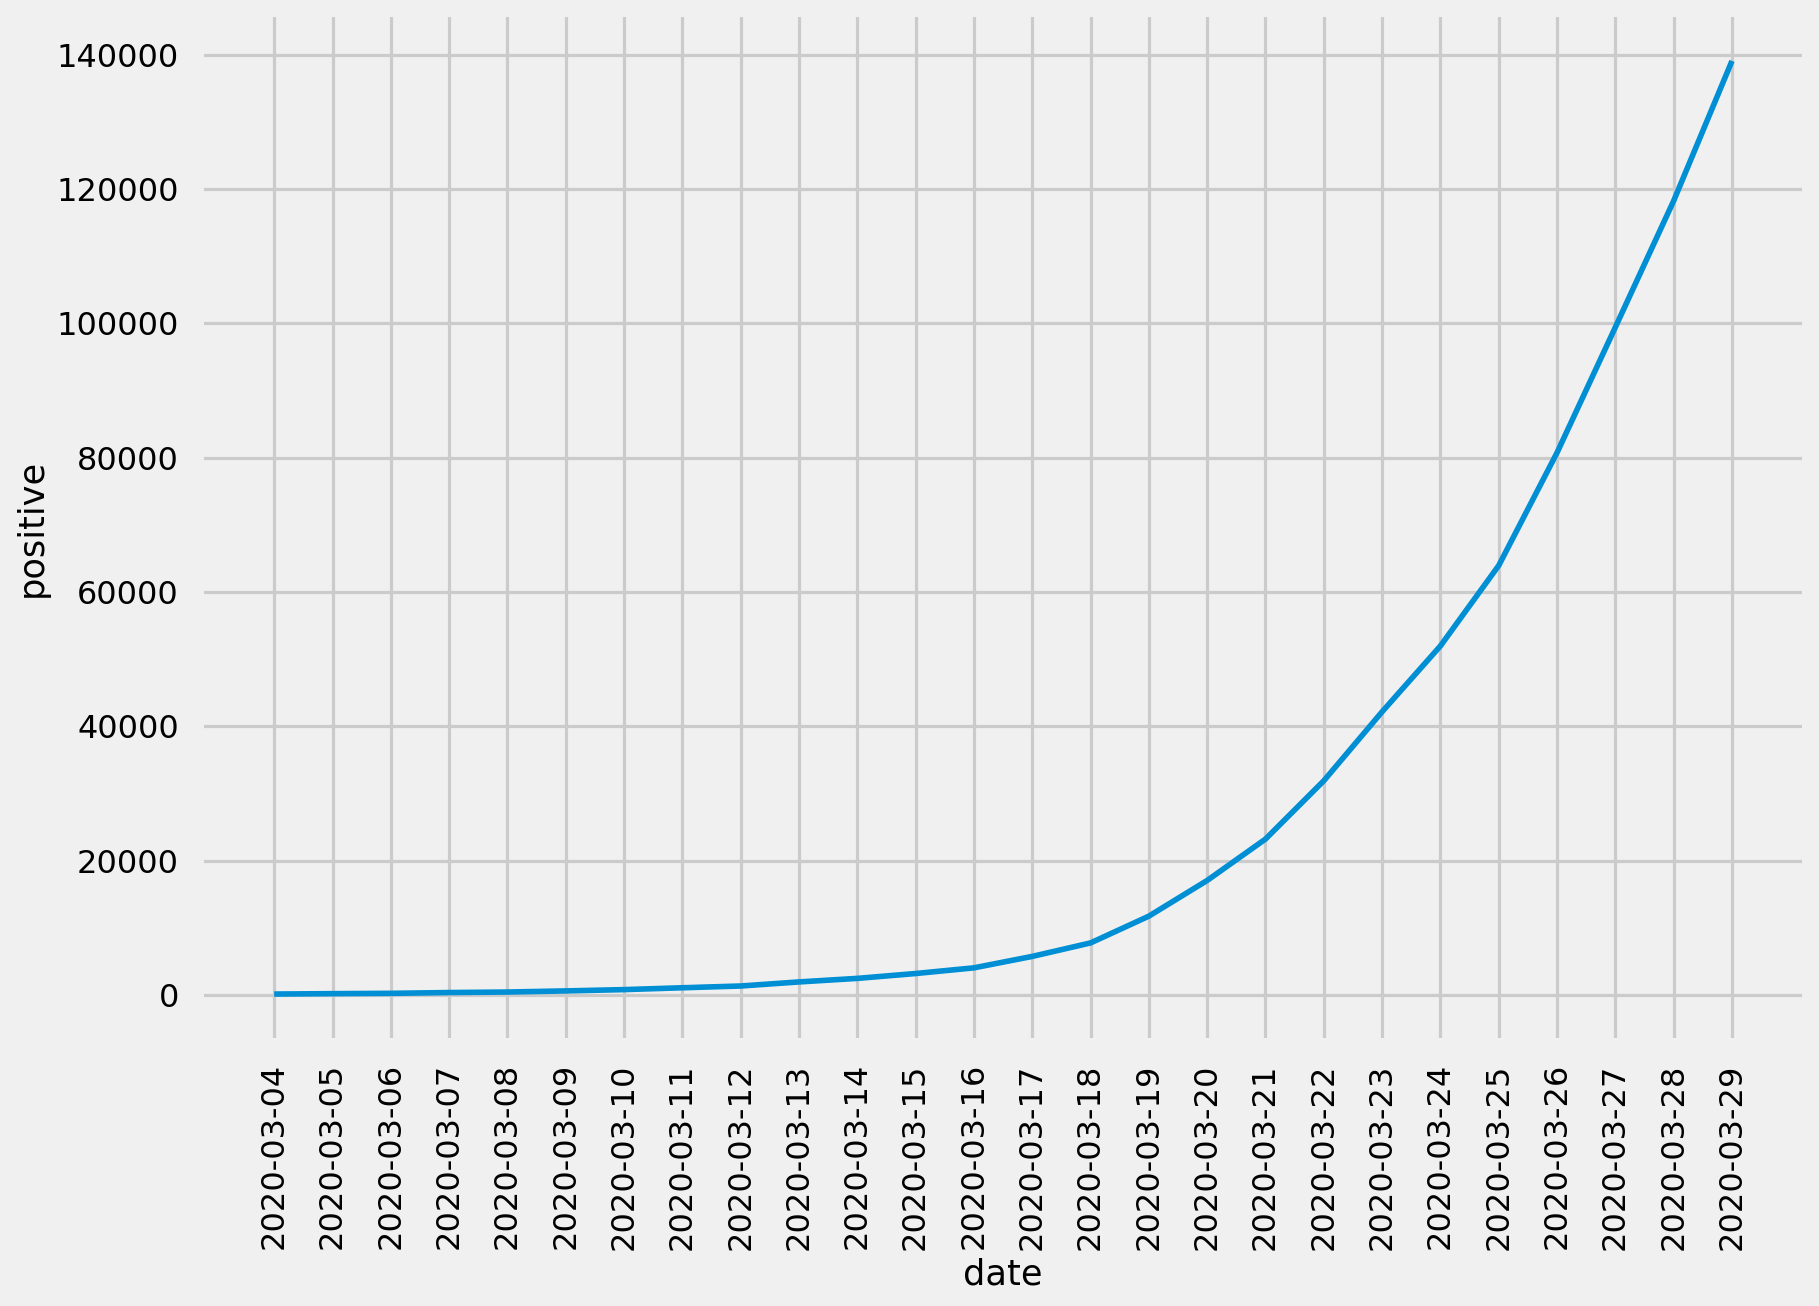

In [14]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  data=df_us)
ax.set(xticks=df_us.date.values)
plt.xticks(rotation=90)
plt.show()

# California Positive Cases

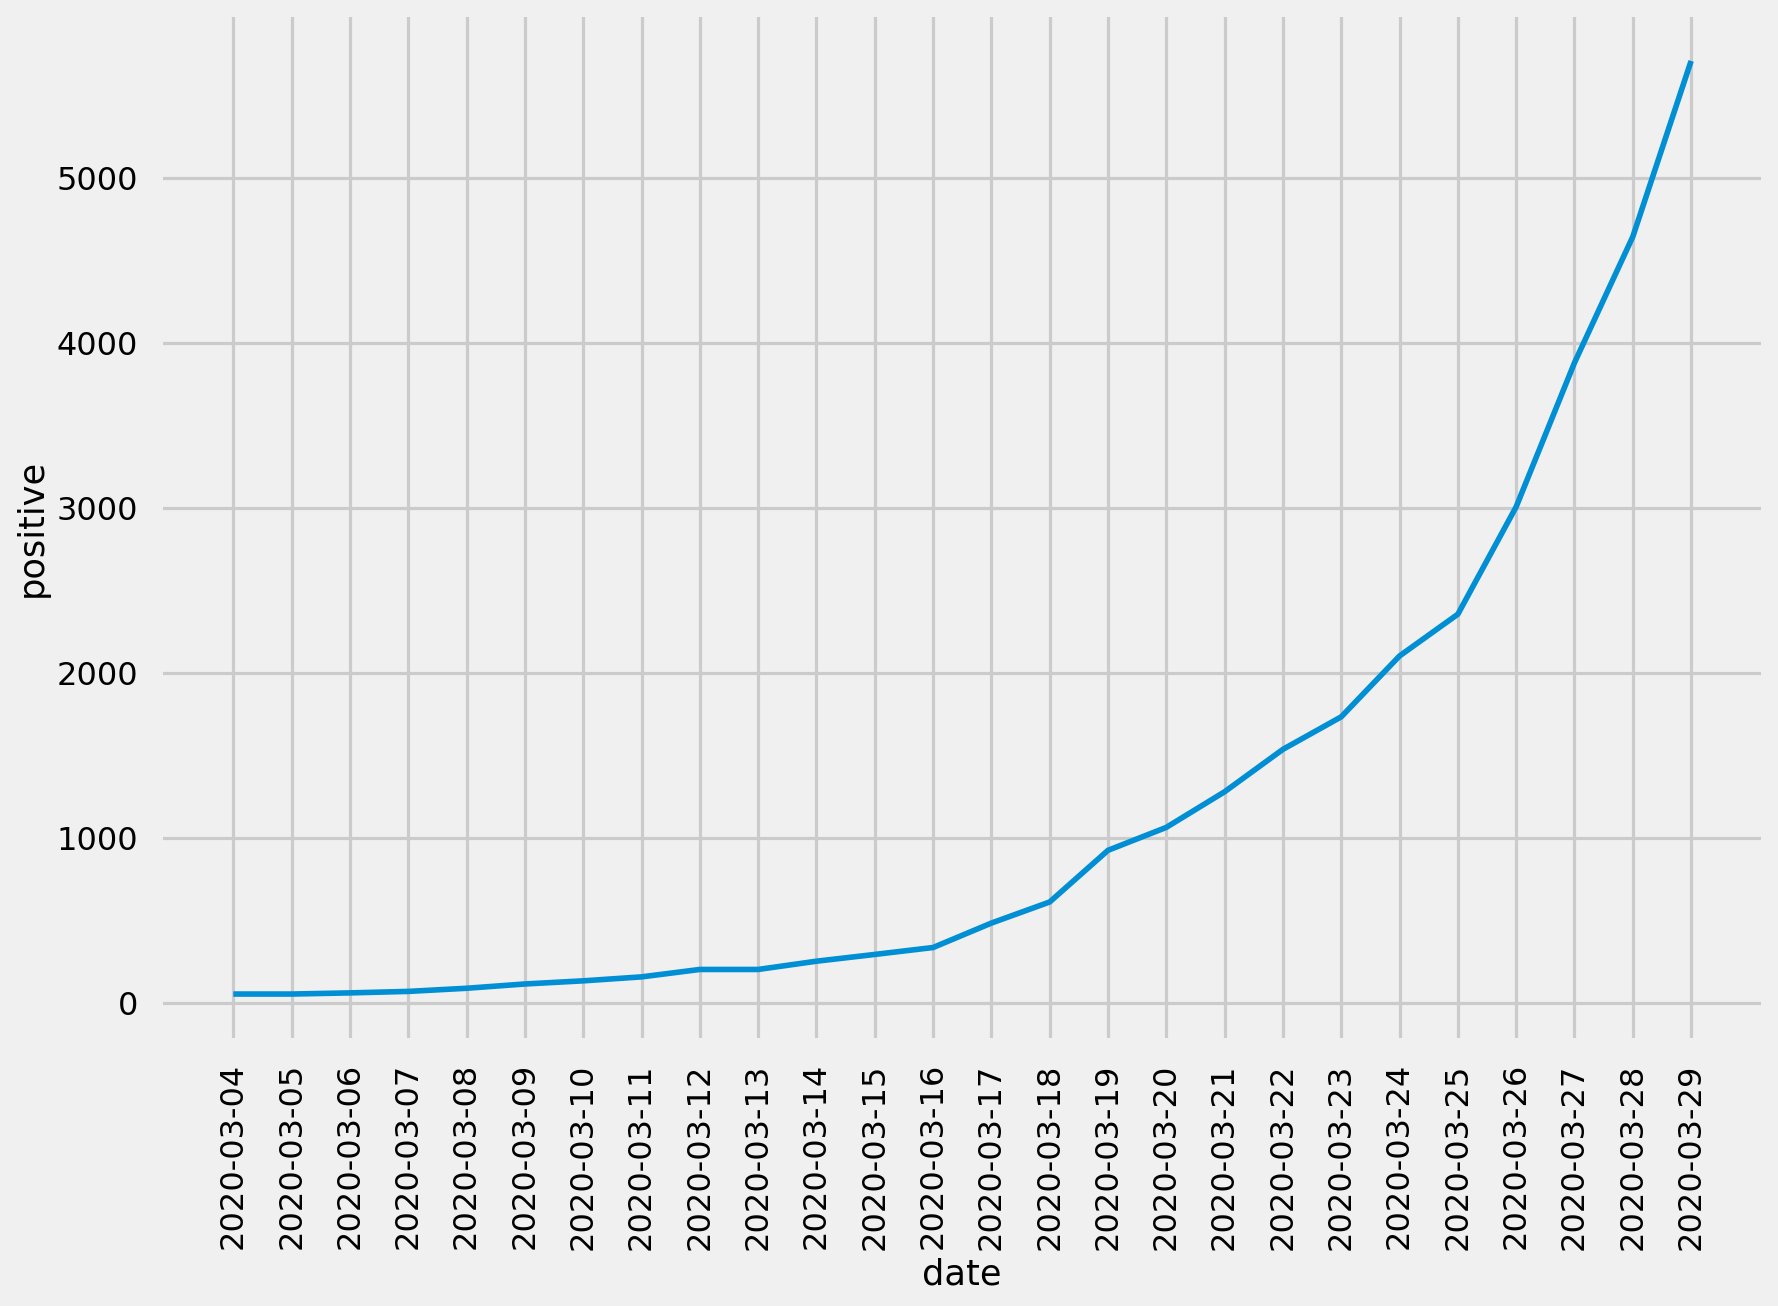

In [15]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
plt.show()

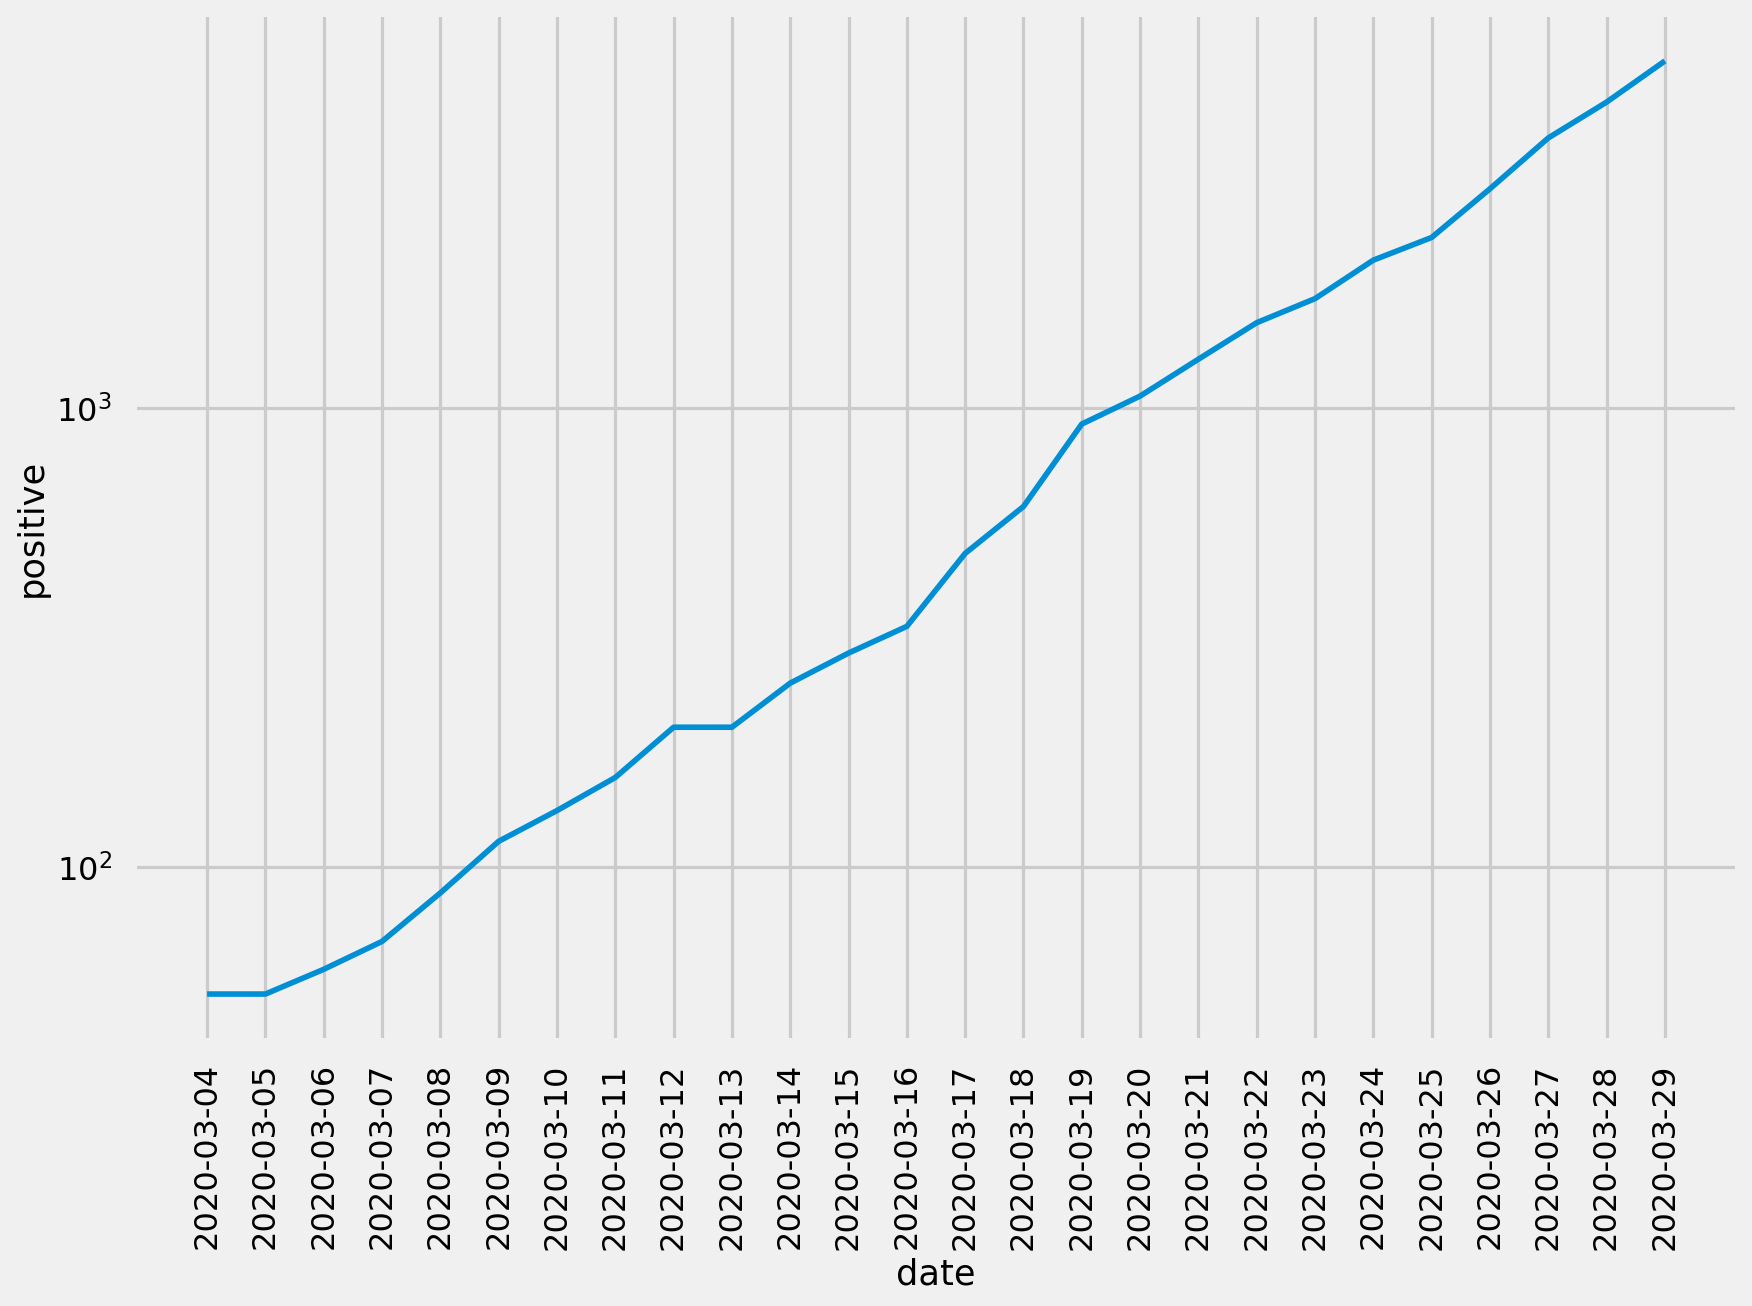

In [16]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

## Positive and Total Tests

## California

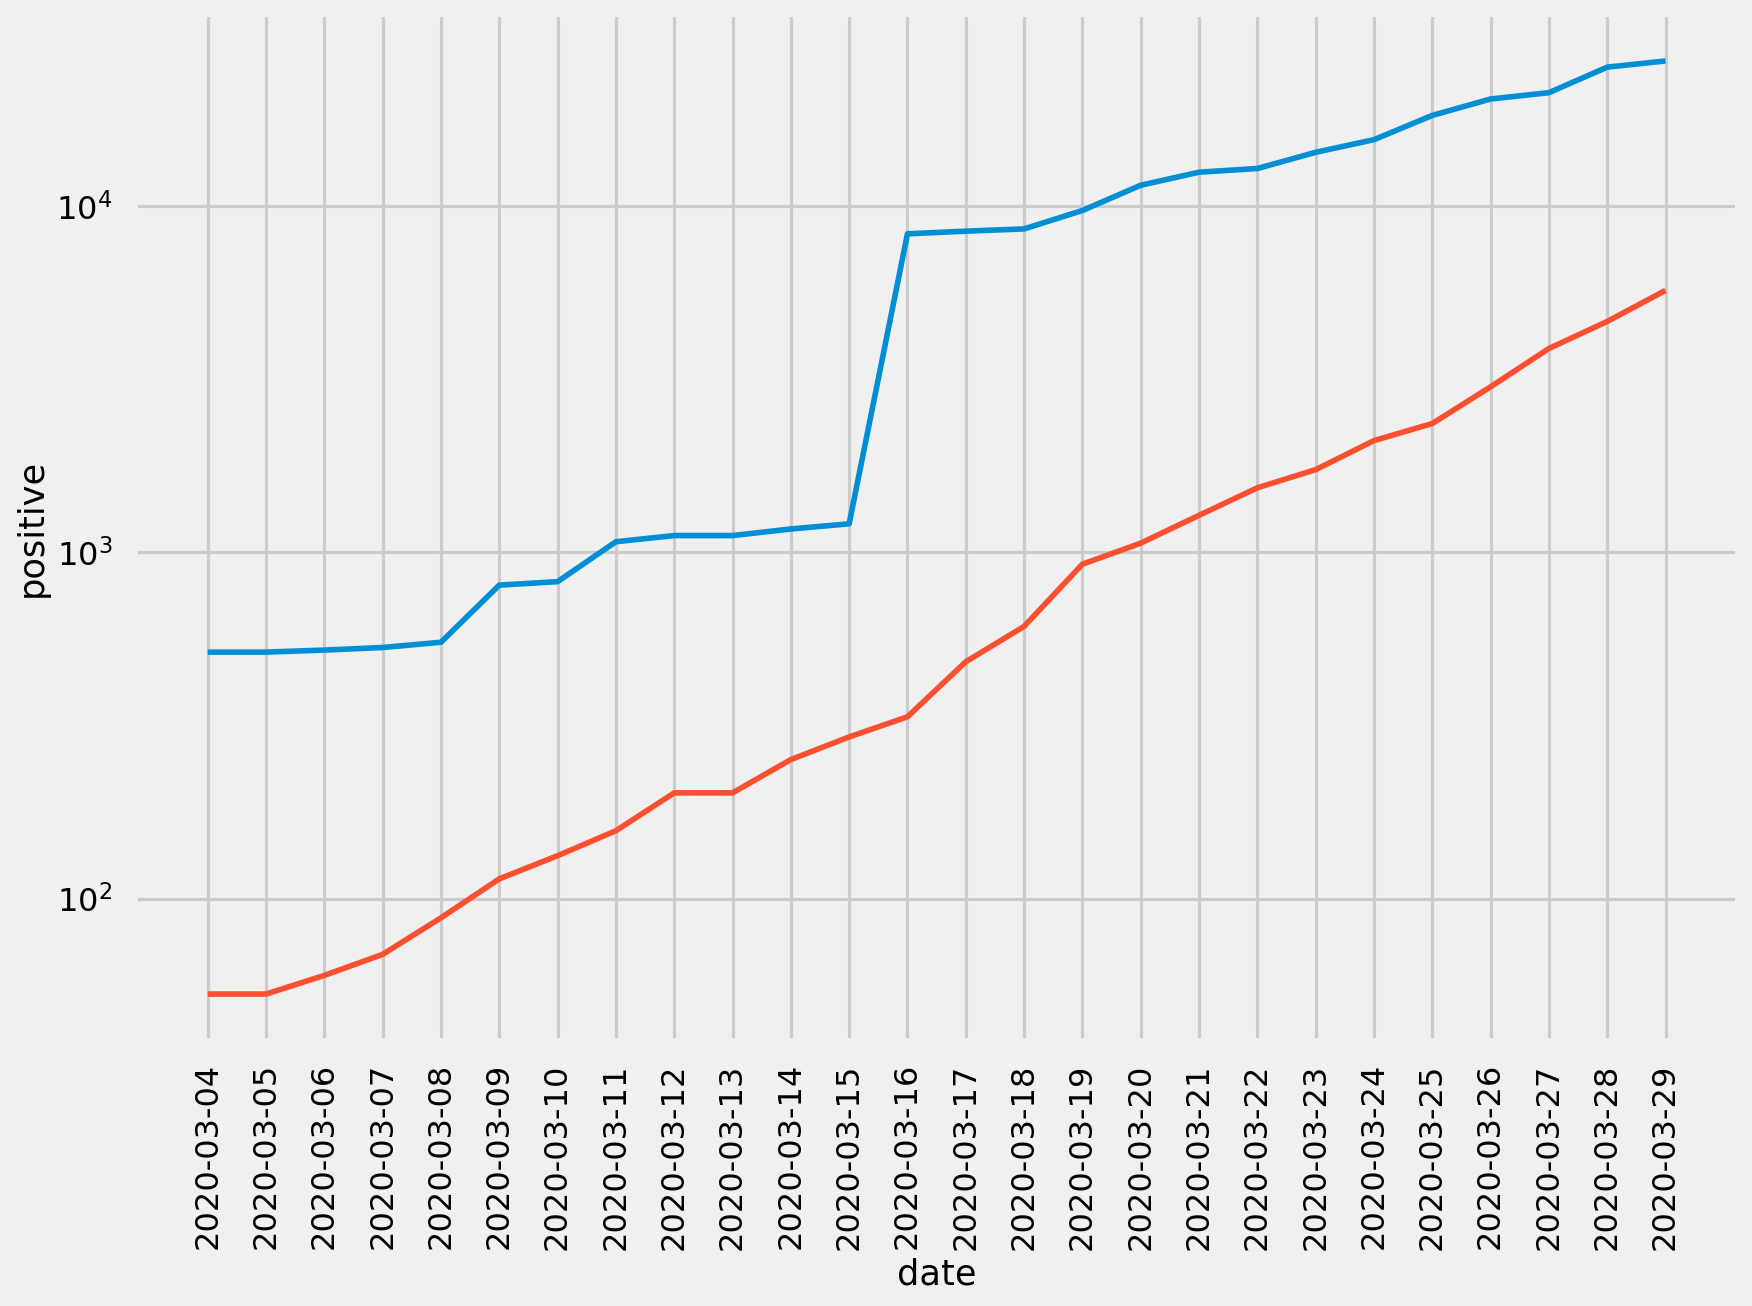

In [17]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "CA"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

## New York

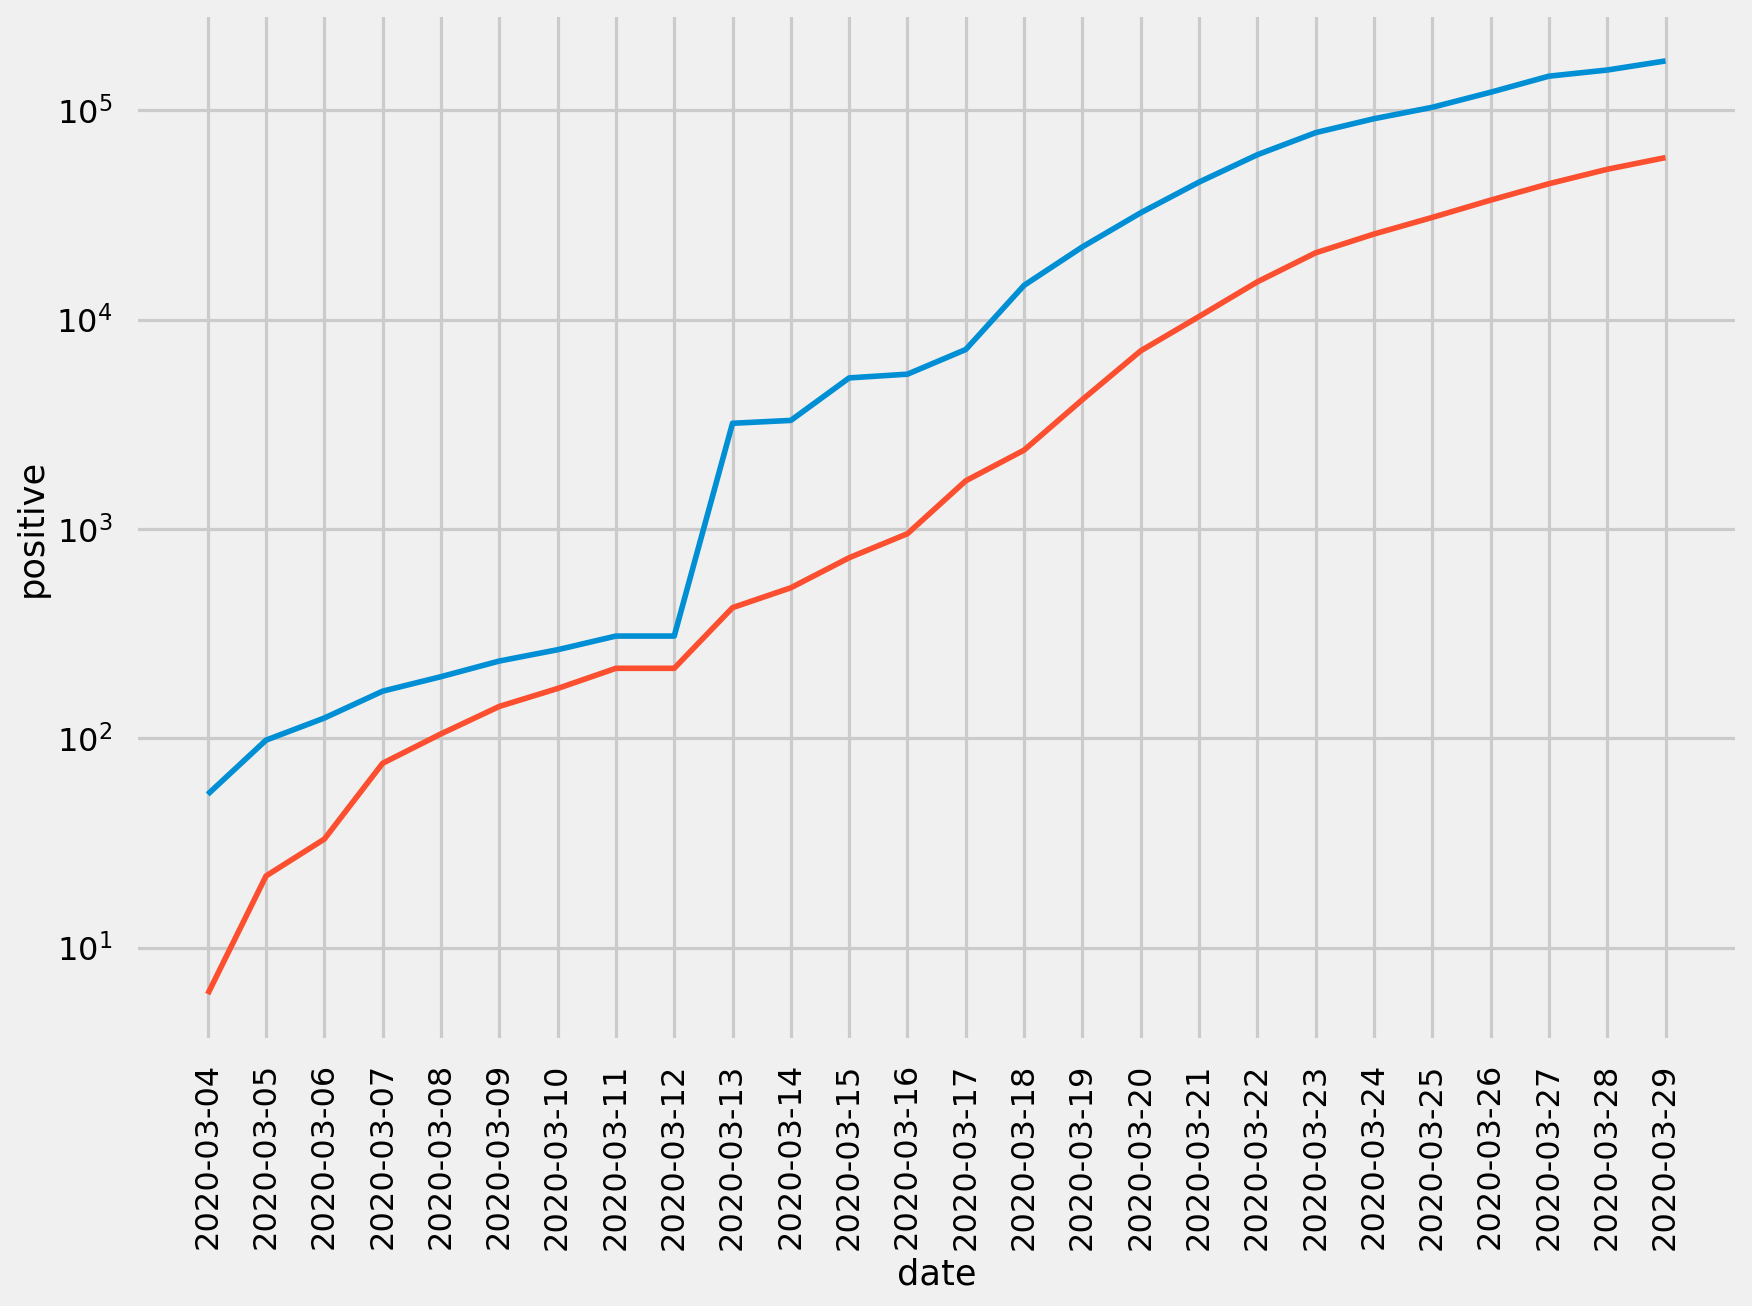

In [18]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "NY"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "NY"'))
ax.set(xticks=df_states.query('state == "NY"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

# Top 10 States

In [19]:
latest_date = df_states['date'].max()
top_states = df_states.query('date == @latest_date').sort_values(by='positive', 
                                                    ascending=False).state.head(10).tolist()
df_top_states = df_states.query('state == @top_states')
top_states

['NY', 'NJ', 'CA', 'MI', 'MA', 'IL', 'WA', 'FL', 'LA', 'PA']

In [20]:
df_states.query('date == @latest_date').sort_values(by='positive', ascending=False)[['state', 'positive']]

,state,positive
829,NY,59513.0
755,NJ,13386.0
97,CA,5708.0
537,MI,5486.0
463,MA,4955.0
342,IL,4596.0
1162,WA,4310.0
220,FL,4246.0
440,LA,3540.0
929,PA,3394.0


# Top State Positive Cases (Log Scale)

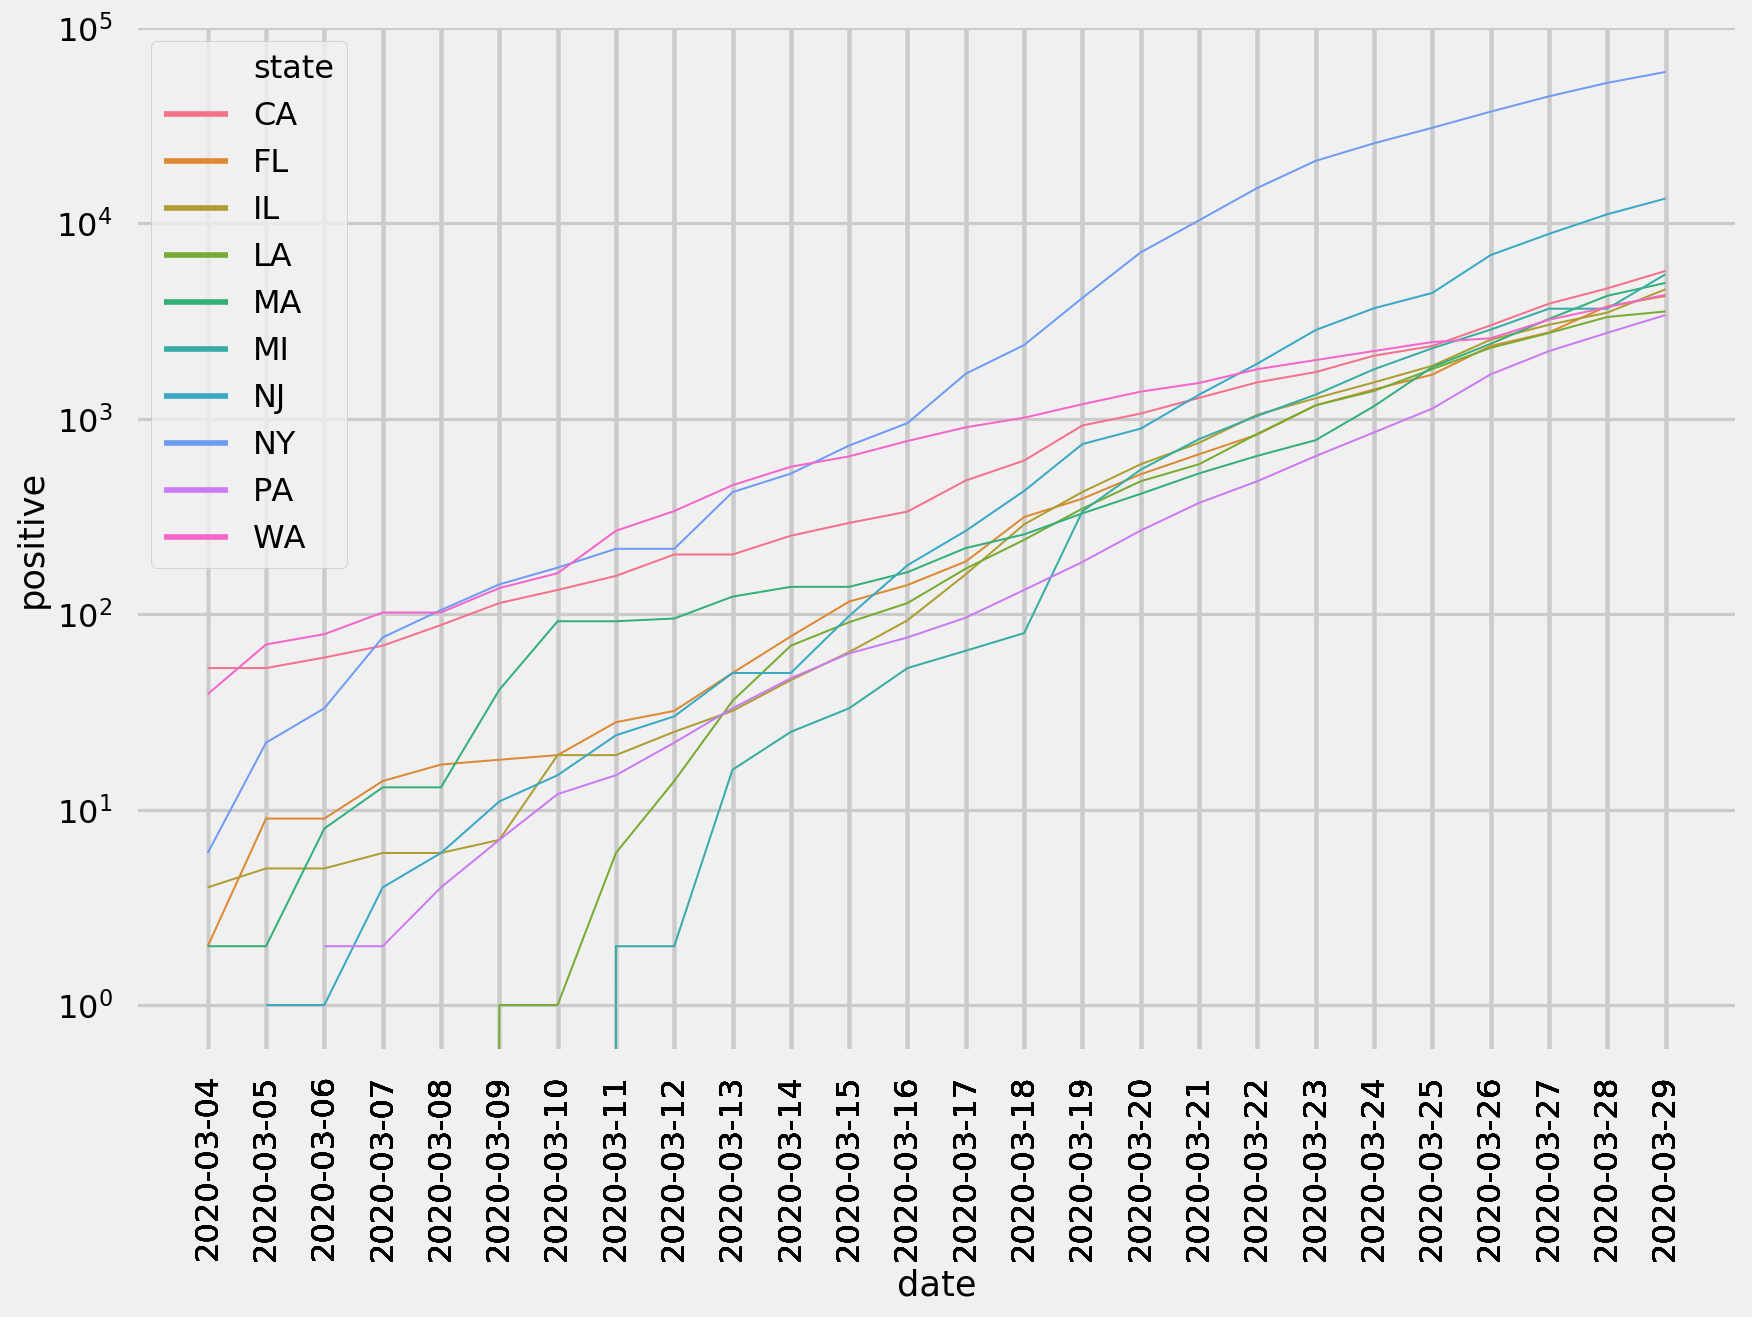

In [21]:
ax = sns.lineplot(x="date", y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases as Percent of Population (Log Scale)

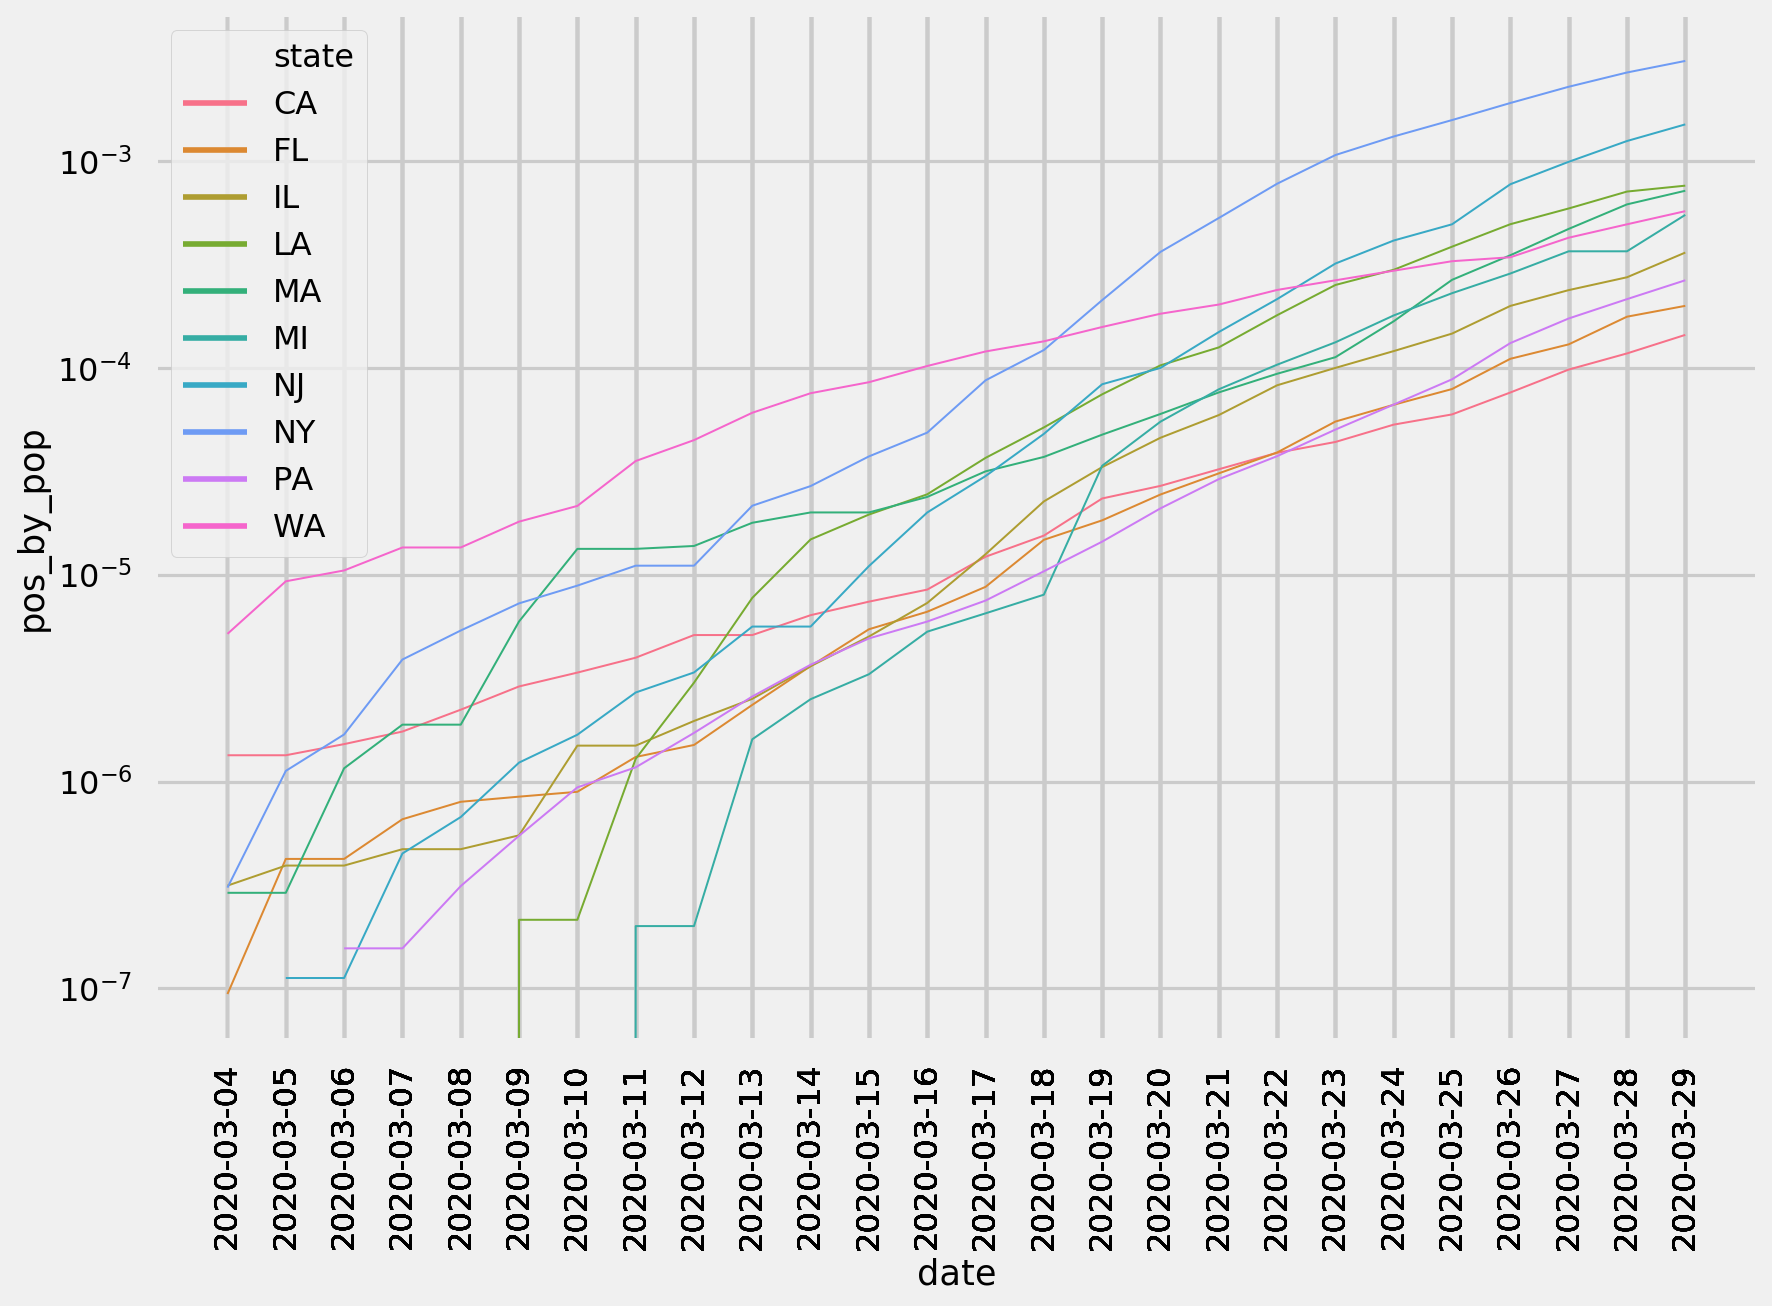

In [22]:
ax = sns.lineplot(x="date", y="pos_by_pop", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Percentage of Population Tested

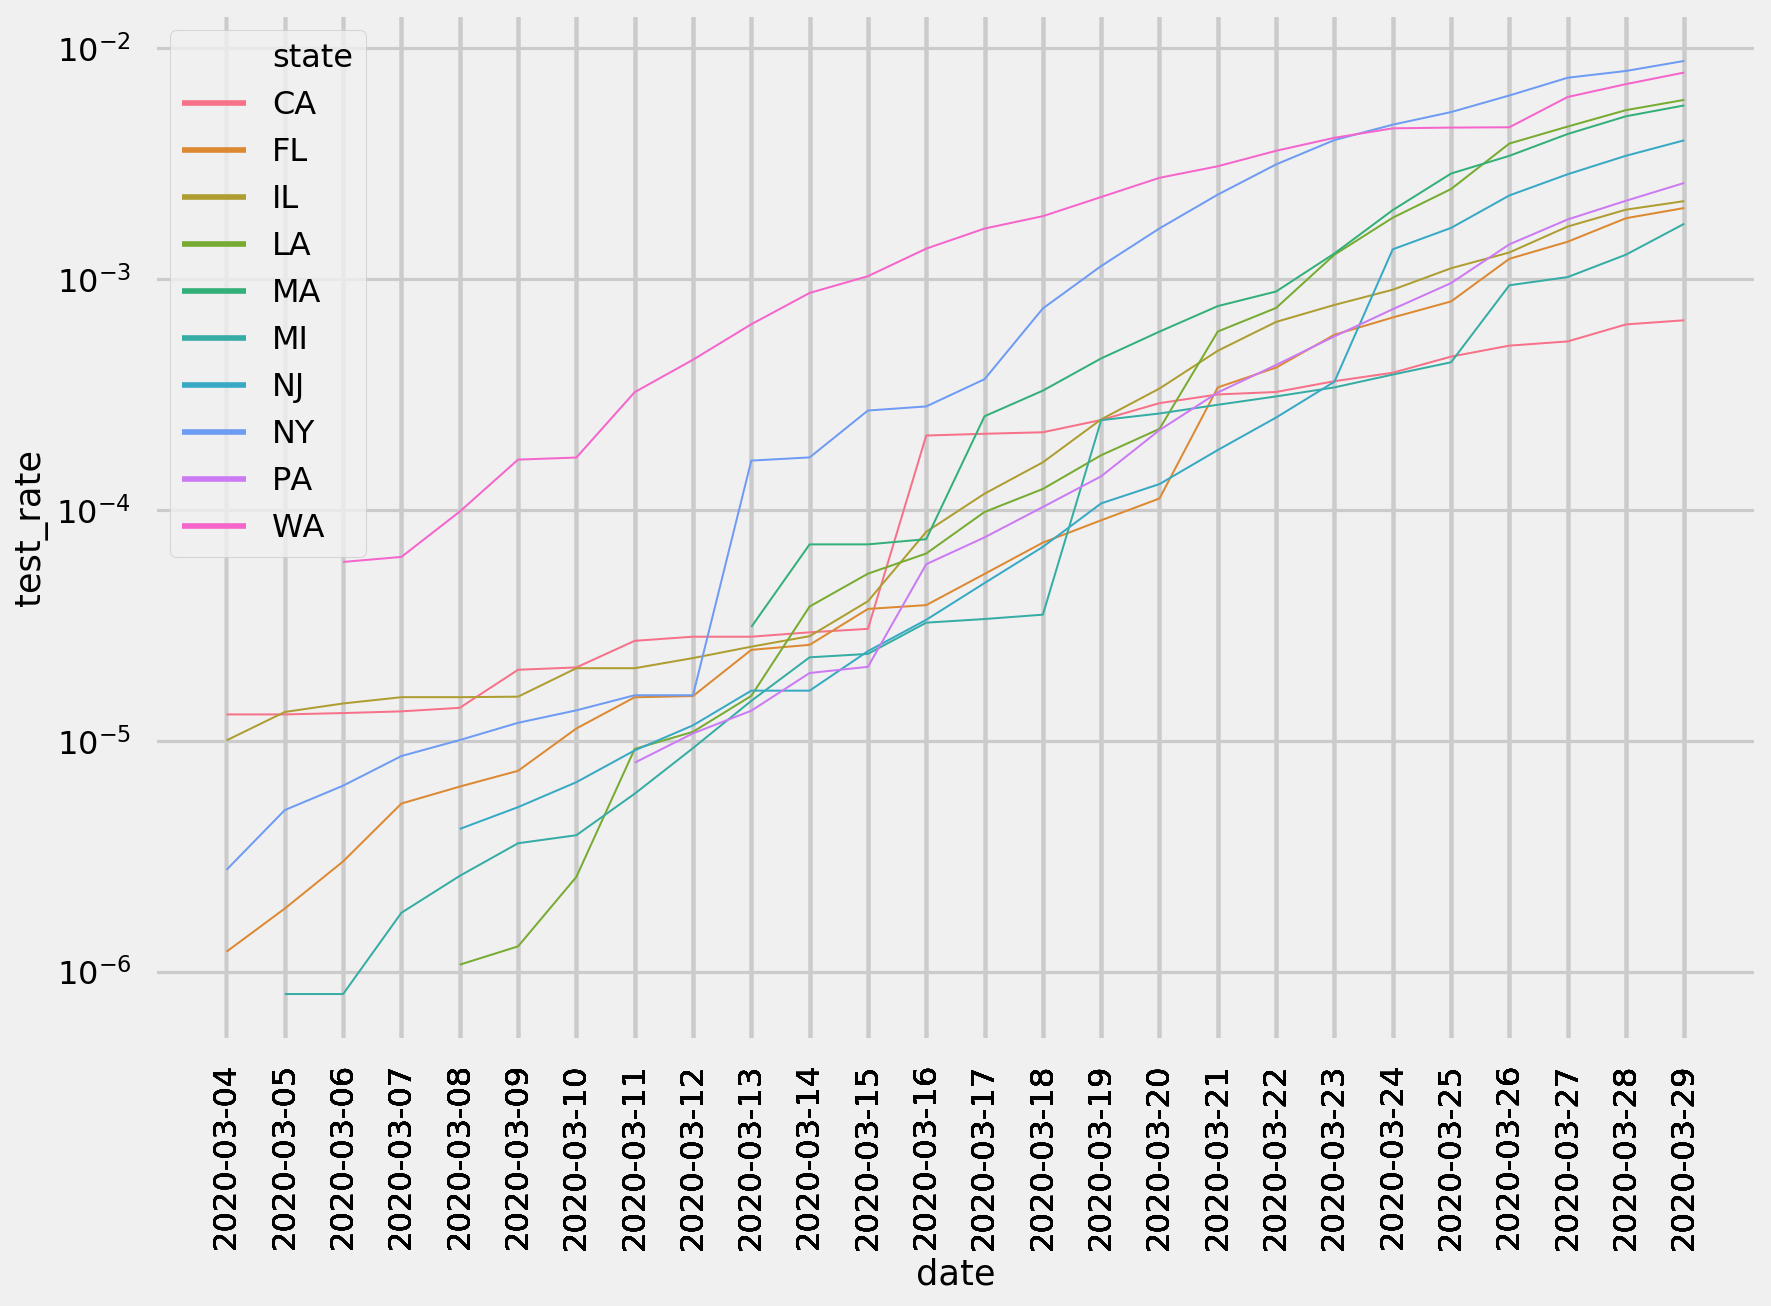

In [23]:
ax = sns.lineplot(x="date", y="test_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()